## Descriptive Statistics

 Import **NumPy**, **SciPy**, and **Pandas**

In [3]:
import numpy as np
import scipy as sc
import pandas as pd

 Randomly generate 1,000 samples from the normal distribution using `np.random.normal()`(mean = 100, standard deviation = 15)

In [4]:
mu, sigma = 100, 15
samples = np.random.normal(mu, sigma, 1000)

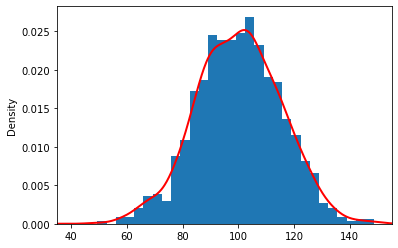

In [5]:
pd.Series(samples).plot.hist(bins=30,density=True,xlim=[35,155])
pd.Series(samples).plot.kde(linewidth=2, color='r');

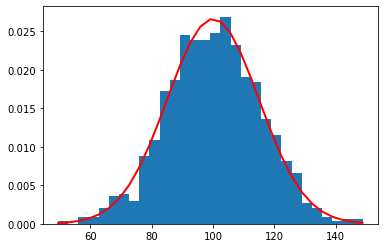

In [6]:
# Alternate
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(samples, 30, density=True)
plt.plot(bins, 
         1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

Compute the **mean**, **median**, and **mode**

In [7]:
mean = np.mean(samples)
median = np.median(samples)
mode = sc.stats.mode(samples)[0][0]

print(f"""mean\t: {mean}
median\t: {median}
mode\t: {mode}""") 

mean	: 100.12562912538063
median	: 100.32283073594766
mode	: 49.454645971854355


Compute the **min**, **max**, **Q1**, **Q3**, and **interquartile range**

In [8]:
min = np.min(samples)
max = np.max(samples)
q1 = np.percentile(samples,25)
q3 = np.percentile(samples,75)
iqr = q3 - q1

print(f"""min\t: {min}
max\t: {max}
Q1\t: {q1}
Q3\t: {q3}
IQR\t: {iqr}""") 

min	: 49.454645971854355
max	: 148.78245604996224
Q1	: 89.8231249630904
Q3	: 110.41579785664395
IQR	: 20.592672893553555


Compute the **variance** and **standard deviation**

In [9]:
variance = np.var(samples)
std_dev = np.std(samples)

print(f"""Variance: {variance}
S.Dev\t: {std_dev}""") 

Variance: 229.02561905984814
S.Dev	: 15.133592404311942


Compute the **skewness** and **kurtosis**

In [10]:
skewness = sc.stats.skew(samples)
kurtosis = sc.stats.kurtosis(samples)

print(f"""Skewness: {skewness}
Kurtosis: {kurtosis}""") 

Skewness: -0.02073125578872321
Kurtosis: 0.004587048984168174


## NumPy Correlation Calculation

Create an array x of integers between 10 (inclusive) and 20 (exclusive). Use `np.arange()`

In [11]:
x = np.arange(10,20,1)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Then use `np.array()` to create a second array y containing 10 arbitrary integers.

In [12]:
y = np.array(sorted(np.random.randint(0,1000,10)))
y

array([266, 277, 564, 701, 753, 836, 859, 947, 963, 978])

Once you have two arrays of the same length, you can compute the **correlation coefficient** between x and y

In [13]:
r = np.corrcoef(x,y)
r

array([[1.       , 0.9431162],
       [0.9431162, 1.       ]])

In [14]:
print(f"Correlation Coeff: {r[0][1]}")

Correlation Coeff: 0.9431161968498156


## Pandas Correlation Calculation

Run the code below

In [15]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

Call the relevant method  to calculate Pearson's r correlation.

In [16]:
print(f"Pearson Correlation Coeff: {np.corrcoef(x,y)[0][1]}")

# Alternative
print(f"Pearson Correlation Coeff: {sc.stats.pearsonr(x,y)[0]}")

Pearson Correlation Coeff: 0.7586402890911867
Pearson Correlation Coeff: 0.7586402890911869


OPTIONAL. Call the relevant method to calculate Spearman's rho correlation.

In [17]:
rho = sc.stats.spearmanr(x,y)
rho 

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [18]:
print(f"Spearman's rho correlation Coeff: {rho[0]}")

Spearman's rho correlation Coeff: 0.9757575757575757


## Seaborn Dataset Tips

Import Seaborn Library

In [19]:
import seaborn as sns

Load "tips" dataset from Seaborn

In [20]:
tips = sns.load_dataset("tips")

Generate descriptive statistics include those that summarize the central tendency, dispersion

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [23]:
def desc_statistics(df):
  numeric_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
  categorical_cols = df.select_dtypes(include=['category']).columns.tolist()

  for i in numeric_cols:
    mean = np.mean(df[i])
    median = np.median(df[i])
    mode = sc.stats.mode(df[i])[0][0]

    min = np.min(df[i])
    max = np.max(df[i])
    q1 = np.percentile(df[i],25)
    q3 = np.percentile(df[i],75)
    iqr = q3 - q1
    range = max-min

    variance = np.var(df[i])
    std_dev = np.std(df[i])

    skewness = sc.stats.skew(df[i])
    kurtosis = sc.stats.kurtosis(df[i])

    print(f"""\nDesriptive Statistics for "{i}" column:\n_____________________________""")
    print(f"""mean\t: {mean}
median\t: {median}
mode\t: {mode}
min\t: {min}
max\t: {max}
Q1\t: {q1}
Q3\t: {q3}
IQR\t: {iqr}
Range\t: {range}
Variance: {variance}
S.Dev\t: {std_dev}
Skewness: {skewness}
Kurtosis: {kurtosis}""") 
    

  for i in categorical_cols:
    mode = sc.stats.mode(df[i])[0][0]
    print(f"""\nDesriptive Statistics for "{i}" column:\n_____________________________""")
    print(f"""mode\t: {mode}""") 
    print(f'Unique Values of "{i}": {sorted(df[i].unique())}')
    print(f"""\nValue Count of "{i}":\n_____________________________""")
    print(f'{df[i].value_counts()}')
    


In [24]:
desc_statistics(tips)


Desriptive Statistics for "total_bill" column:
_____________________________
mean	: 19.78594262295082
median	: 17.795
mode	: 13.42
min	: 3.07
max	: 50.81
Q1	: 13.3475
Q3	: 24.127499999999998
IQR	: 10.779999999999998
Range	: 47.74
Variance: 78.92813148851114
S.Dev	: 8.884150577771132
Skewness: 1.1262346334818638
Kurtosis: 1.1691681323851366

Desriptive Statistics for "tip" column:
_____________________________
mean	: 2.99827868852459
median	: 2.9
mode	: 2.0
min	: 1.0
max	: 10.0
Q1	: 2.0
Q3	: 3.5624999999999996
IQR	: 1.5624999999999996
Range	: 9.0
Variance: 1.9066085124966412
S.Dev	: 1.3807999538298954
Skewness: 1.4564266884221506
Kurtosis: 3.5495519893455114

Desriptive Statistics for "size" column:
_____________________________
mean	: 2.569672131147541
median	: 2.0
mode	: 2
min	: 1
max	: 6
Q1	: 2.0
Q3	: 3.0
IQR	: 1.0
Range	: 5
Variance: 0.9008834990593925
S.Dev	: 0.9491488287193913
Skewness: 1.4389653841920984
Kurtosis: 1.6719276263625504

Desriptive Statistics for "sex" column:
_____

In [28]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Range = Max - Min
    Mean= df.mean()
    Median = df.quantile(0.5)
    Mode = df.apply(lambda x: sc.stats.mode(x)).T[0]
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Variance = df.var()
    Std= df.std()
    Kurtosis = df.kurtosis()
    Skewness = df.skew()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max','Range','Mean','Mode','Q1','Median','Q3','IQR','Variance','Std','Kurtosis','Skewness']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max, Range, Mean, Mode, Q1, Median, Q3, IQR, Variance, Std, Kurtosis, Skewness,
                        ], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(tips).sort_values(by='Nulls', ascending=False).T)

Data shape: (244, 7)
___________________________
Data Types:
float64     2
int64       1
category    1
category    1
category    1
category    1
Name: Types, dtype: int64
___________________________


,day,sex,size,smoker,time,tip,total_bill
Types,category,category,int64,category,category,float64,float64
Counts,244,244,244,244,244,244,244
Uniques,4,2,6,2,2,123,229
Nulls,0,0,0,0,0,0,0
Min,NaN,NaN,1.0,NaN,NaN,1.0,3.07
Max,NaN,NaN,6.0,NaN,NaN,10.0,50.81
Range,NaN,NaN,5.0,NaN,NaN,9.0,47.74
Mean,NaN,NaN,2.569672,NaN,NaN,2.998279,19.785943
Mode,[Sat],[Male],[2],[No],[Dinner],[2.0],[13.42]
Q1,NaN,NaN,2.0,NaN,NaN,2.0,13.3475


Call the relevant method to calculate pairwise Pearson's r correlation of columns

In [26]:
tips.corr(method='pearson') 
# method:['pearson','kendall','spearman'], pearson is default

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


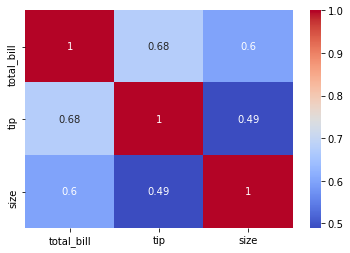

In [27]:
sns.heatmap(tips.corr(), cmap='coolwarm',annot=True); 